<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Unsupervised Learning - KMeans - Customer Segmentation
</b></font> </br></p>

---


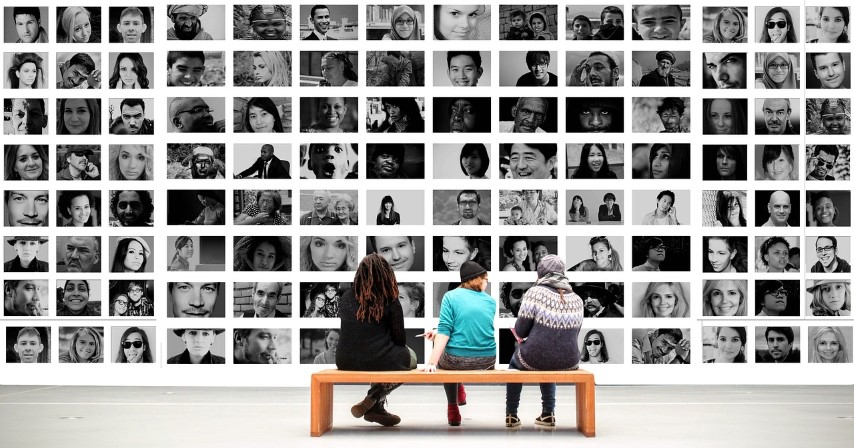

Bild von <a href="https://pixabay.com/de/users/geralt-9301/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=2944064">Gerd Altmann</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=2944064">Pixabay</a>

# **1 <font color='orange'>|</font>  Understand**

---


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Aufgabe verstehen</br>
✅ Daten sammeln</br>
✅ Statistische Analyse (Min, Max, Mean, Korrelation, ...)</br>
✅ Datenvisualisierung (Streudiagramm, Box-Plot, ...)</br>
✅ Prepare Schritte festlegen</br>

<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

Bei der Kundenpersönlichkeitsanalyse handelt es sich um eine detaillierte Analyse der idealen Kunden eines Unternehmens. Es hilft einem Unternehmen, seine Kunden besser zu verstehen und erleichtert es ihm, Produkte an die spezifischen Bedürfnisse, Verhaltensweisen und Bedenken verschiedener Kundentypen anzupassen. Die Analyse der Kundenpersönlichkeit hilft einem Unternehmen, sein Produkt basierend auf seinen Zielkunden aus verschiedenen Kundensegmenten zu modifizieren. Anstatt beispielsweise Geld auszugeben, um jedem Kunden in der Unternehmensdatenbank ein neues Produkt zu vermarkten, kann ein Unternehmen analysieren, welches Kundensegment das Produkt am wahrscheinlichsten kaufen wird, und das Produkt dann nur in diesem bestimmten Segment vermarkten.   



[DataSet](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

[Info](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)   

[Analysis](https://thecleverprogrammer.com/2021/02/08/customer-personality-analysis-with-python/)



<p><font color='black' size="5">
Daten laden
</font></p>



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# filename = '/content/drive/MyDrive/ml-kurs/02 data/customer_segmentation.csv'
# import pandas as pd
# df = pd.read_csv(filename, sep='\t')

In [ ]:
filename = 'https://raw.githubusercontent.com/ralf-42/ml-kurs/main/02%20data/customer_segmentation.csv'
import pandas as pd
df = pd.read_csv(filename, sep='\t')

In [ ]:
data = df.copy()

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [ ]:
data.info()

In [ ]:
data.describe().T

In [ ]:
data['Education'].value_counts()

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Plotly
</font></p>

In [ ]:
import plotly.express as px
import plotly.subplots as sp

In [ ]:
# 3 Boxplots
title_ = 'Income'
box1 = px.box(data['Income'], title=title_, width=600, height=600)

title_ = 'Recency'
box2 = px.box(data['Recency'], title=title_, width=600, height=600)

title_ = 'MntWines'
box3 = px.box(data['MntWines'], title=title_, width=600, height=600)

title_ = 'Year_Birth'
box4 = px.box(data['Year_Birth'], title=title_, width=600, height=600)

fig = sp.make_subplots(rows=1, cols=4, subplot_titles=('Income', 'Recency', 'MntWines', 'Year_Birth'))

for trace in box1.data: fig.add_trace(trace, row=1, col=1)
for trace in box2.data: fig.add_trace(trace, row=1, col=2)
for trace in box3.data: fig.add_trace(trace, row=1, col=3)
for trace in box4.data: fig.add_trace(trace, row=1, col=4)

# Layout anpassen
fig.update_layout(width=1000, height=500, title_text='Box-Plots')

# Plot anzeigen
fig.show()

# **2 <font color='orange'>|</font> Prepare**

---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Nicht benötigte Features löschen</br>
✅ Datentyp ermitteln/ändern</br>
✅ Duplikate ermitteln/löschen</br>
✅ Missing Values behandeln</br>
✅ Ausreißer behandeln</br>
✅ Kategorischer Features codieren</br>
✅ Numerischer Features skalieren</br>
✅ Dimensionalität reduzieren</br>
✅ Datensampling (Over-/Undersampling)</br>
✅ Feature-Engineering (neue Features schaffen)</br>
✅ Pipeline erstellen/konfigurieren</br>

<p><font color='black' size="5">
Feature Engineering
</font></p>

In [ ]:
data["Age"] = 2023-data['Year_Birth']

In [ ]:
data["Children"]=data["Kidhome"]+data["Teenhome"]

In [ ]:
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

In [ ]:
data['Purchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

In [ ]:
# --- Kunde seit x Jahren
data['Kunde_seit'] = data['Dt_Customer'].str.split('-', expand=True)[2].astype(int)
data['Kunde_seit'] = 2023 - data['Kunde_seit']

<p><font color='black' size="5">
Nicht benötigte Feature löschen
</font></p>

In [ ]:
data.drop(['ID',
          'Year_Birth', 'Kidhome', 'Teenhome',
          'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
          'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
          'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
          'NumDealsPurchases', 'Z_CostContact', 'Z_Revenue',
          'Dt_Customer' ], axis='columns', inplace=True)

In [ ]:
data.info()

<p><font color='black' size="5">
Outlier löschen
</font></p>

In [ ]:
data=data.dropna(subset=['Income'])
data=data[data['Income']<200000]
data=data[data['Age']<65]

In [ ]:
# --- Daten vor Codierung/Skalierung
data_before = data.copy()

<p><font color='black' size="5">
Datentyp ermitteln
</font></p>

In [ ]:
all_col = data.columns
num_col = data.select_dtypes(include='number').columns
cat_col = data.select_dtypes(exclude='number').columns
nom_col =['Marital_Status']
ord_col = ['Education']

<p><font color='black' size="5">
Codierung
</font></p>

In [ ]:
# data = pd.concat([data, pd.get_dummies(data[nom_col], prefix_sep='_')], axis='columns')
# data.drop(nom_col, axis='columns', inplace=True)
# ---
from sklearn.preprocessing import OrdinalEncoder
data[nom_col] = OrdinalEncoder().fit_transform(data[nom_col])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
data[ord_col] = OrdinalEncoder(categories=[['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']] ).fit_transform(data[ord_col])

<p><font color='black' size="5">
Skalierung
</font></p>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data[all_col] = MinMaxScaler().fit_transform(data[all_col])

# **3 <font color='orange'>|</font> Modeling**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Train-Test-Split erstellen</br>
✅ Modellauswahl treffen</br>
✅ Pipeline erweitern/konfigurieren</br>
✅ Training durchführen</br>


<p><font color='black' size="5">
Modellauswahl & Training
</font></p>

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(data)

# **4 <font color='orange'>|</font> Evaluate**
---


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Prognose (Train, Test) erstellen</br>
✅ Modellgüte prüfen</br>
✅ Residuenanalyse erstellen</br>
✅ Feature Importance/Selektion prüfen</br>
✅ Robustheitstest erstellen</br>
✅ Modellinterpretation erstellen</br>
✅ Sensitivitätsanalyse erstellen</br>
✅ Kommunikation (Key Takeaways)</br>

<p><font color='black' size="5">
Silhouettenkoeffizient
</font></p>

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_coef = silhouette_score(data, model.labels_)
print("Silhouette-Koeffizient:", silhouette_coef)

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(data)
visualizer.show()

In [ ]:
from yellowbrick.cluster import intercluster_distance
visualizer = intercluster_distance(model, data)

<p><font color='black' size="5">
Aufbau Analysewürfel
</font></p>

In [ ]:
# Übernahme der Testdaten
cube = data_before.copy()
cube.reset_index(inplace=True)
# Übernahme Target real & predict
cube['predict'] = model.labels_

In [ ]:
# Erstellung 2D Features über Dimensionsreduktion PCA - unsupervised
from sklearn.decomposition import PCA
pca = PCA()
pca_np = pca.fit_transform(data)

# Cube um pca erweitern
col_name = [("PCA" + str(i+1)) for i in range(pca_np.shape[1])]
pca_df = pd.DataFrame(pca_np, columns=col_name)
cube = pd.concat([cube, pca_df], axis=1)

In [ ]:
cube['predict_cat'] = cube['predict'].astype(str)
title_ = 'Streupunktdiagramm Income/Spent'
fig = px.scatter(cube, x='Income', y='Spent', color='predict_cat', width=600, height=600)
fig.update_layout(width=1000, height=500, title_text=title_)
fig.show()

In [ ]:
# Histogramm
title_ = 'Histogramm Segmente'
fig = px.histogram(cube, x=['predict_cat'], text_auto=".2s", title=title_)
fig.update_layout(barmode='group',bargap=0.1, width=800, height=600)
fig.show()

In [ ]:
fig = px.box(cube,
             x='predict',
             y=['Income'],
             color='predict',
             title = 'Income',
             width=1000,
             height=400)
fig.show()

In [ ]:
fig = px.box(cube,
             x='predict',
             y=['Spent'],
             color='predict',
             title = 'Spent',
             width=1000,
             height=400)
fig.show()

In [ ]:
fig = px.box(cube,
             x='predict',
             y=['Children'],
             color='predict',
             title = 'Children',
             width=1000,
             height=400)
fig.show()

In [ ]:
fig = px.box(cube,
             x='predict',
             y=['Purchases'],
             color='predict',
             title = 'Purchases',
             width=1000,
             height=400)
fig.show()

In [ ]:
fig = px.box(cube,
             x='predict',
             y=['PCA1'],
             color='predict',
             title = 'PCA1',
             width=1000,
             height=400)
fig.show()

In [ ]:
fig = px.box(cube,
             x='predict',
             y=['PCA2'],
             color='predict',
             title = 'PCA2',
             width=1000,
             height=400)
fig.show()

# **5 <font color='orange'>|</font> Deploy**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellexport und -speicherung</br>
✅ Abhängigkeiten und Umgebung</br>
✅ Sicherheit und Datenschutz</br>
✅ In die Produktion integrieren</br>
✅ Tests und Validierung</br>
✅ Dokumentation & Wartung</br>